# Introduction to `geopandas` and `cartopy`

## Basic Setup

Again we will be using `pandas` and `matplotlib` in this tutorial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We'll also supress a few disturbing warnings.

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Why do we need something other than `pandas`?

Let's reload again our example dataset of conventional power plants in Europe as a `pd.DataFrame`.

In [3]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"
ppl = pd.read_csv(fn, index_col=0)

This dataset includes coordinates (latitude and longitude), which allows us to plot the location and capacity of all power plants in a scatter plot:

<AxesSubplot:xlabel='lon', ylabel='lat'>

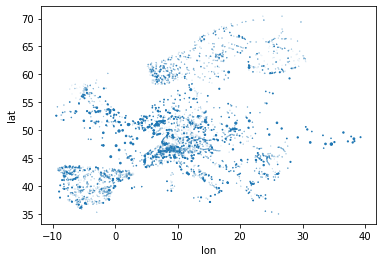

In [4]:
ppl.plot.scatter('lon', 'lat', s=ppl.Capacity/1e3)

However, this graphs misses some geographic reference point, we'd normally expect for a map like shorelines, country borders etc.

## Geopandas - a Pandas extension for geospatial data

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" width="400px" />

Geopandas extends `pandas` by adding support for geospatial data.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store geometry columns and perform spatial operations.

<img src="https://geopandas.org/en/stable/_images/dataframe.svg" width="600px" />

:::{note}
Documentation for this package is available at https://geopandas.org/en/stable/.
:::

Typical geometries are points, lines, and polygons. They come from another library called [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html).

<img src="https://geobgu.xyz/py/_images/simple_feature_types.svg" width="600px" />

First, we need to import the `geopandas` package. The conventional alias is `gpd`:

In [5]:
import geopandas as gpd

We can convert the latitude and longitude values given in the dataset to formal geometries (to be exact: `shapely.Point` objects but we won't go into detail regarding this) using the `gpd.points_from_xy()` function, and use this to `gpd.GeoDataFrame`. We should also specify a so-called coordinate reference system (CRS). The code '4326' means latitude and longitude values.

In [6]:
geometry = gpd.points_from_xy(ppl['lon'], ppl['lat'])
gdf = gpd.GeoDataFrame(ppl, geometry=geometry, crs=4326)

Now, the `gdf` looks like this:

In [7]:
gdf.head(3)

Name Fueltype     Technology    Set  Country  Capacity  Efficiency  \
id                                                                            
0        Doel  Nuclear  Steam Turbine     PP  Belgium    2911.0         NaN   
1     Sarrans    Hydro      Reservoir  Store   France     183.0         NaN   
2   Pragneres    Hydro      Reservoir  Store   France     189.2         NaN   

    DateIn  DateRetrofit  DateOut       lat      lon  Duration  Volume_Mm3  \
id                                                                           
0   1975.0           NaN   2022.0  51.32481  4.25889       NaN         0.0   
1   1932.0           NaN      NaN  44.82942  2.74042       NaN         0.0   
2   1953.0           NaN      NaN  42.82110  0.01033       NaN         0.0   

    DamHeight_m  StorageCapacity_MWh  \
id                                     
0           0.0                  0.0   
1           0.0                  0.0   
2           0.0                  0.0   

                                                  EIC  \
id                                                      
0   {'22WDOELX3000078D', '22WDOELX2000077N', '22WD...   
1                                {'17W100P100P02934'}   
2                                {'17W100P100P02918'}   

                                            projectID  \
id                                                      
0   {'ENTSOE': {'22WDOELX3000078D', '22WDOELX20000...   
1   {'ENTSOE': {'17W100P100P02934'}, 'OPSD': {'OEU...   
2   {'ENTSOE': {'17W100P100P02918'}, 'OPSD': {'OEU...   

                    geometry  
id                            
0   POINT (4.25889 51.32481)  
1   POINT (2.74042 44.82942)  
2   POINT (0.01033 42.82110)

With the additional `geometry` columns, it is now even easier to plot the geographic data:

<AxesSubplot:>

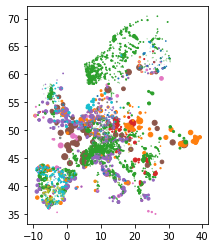

In [8]:
gdf.plot(
    column='Fueltype',
    markersize=gdf.Capacity/1e2,
)

We can also start up an interactive map to explore the geodata in more detail:

In [9]:
gdf.explore(column='Fueltype')

## Map Projections with Cartopy

<img src="https://scitools.org.uk/cartopy/docs/v0.16/_images/sphx_glr_logo_001.png" width="300px" />

Cartopy is a Python package designed for geospatial data processing and has exposed an interface to enable easy map creation using `matplotlib`.

The Earth is a globe, but we present maps usually on two-dimensional surfaces. Hence, we typically need to *project* data points onto flat surfaces (e.g. screens, paper). However, we will always loose some information in doing so.


<img src="https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg" width="500px" />


A map projection is:

> a systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. [Wikipedia: Map projection](https://en.wikipedia.org/wiki/Map_projection).


Different projections **preserve different metric properties**. As a result,
converting geodata from one projection to another is a common exercise in geographic data science.

- **conformal projections** preserve angles/directions (e.g. Mercator projection)
- **equal-area projections** preserve area measure (e.g. Mollweide)
- **equidistant projections** preserve distances between points (e.g. Plate carrée)
- **compromise projections** seek to strike a balance between distortions (e.g. Robinson)

If you like the "Orange-as-Earth" analogy for projections, checkout [this numberphile video](https://www.youtube.com/watch?v=D3tdW9l1690) by Hannah Fry.

:::{note}
Documentation for this package is available at https://scitools.org.uk/cartopy/docs/latest/.
:::

First, we need to import the relevant parts of the `cartopy` package:

In [10]:
import cartopy
import cartopy.crs as ccrs

Let's draw a first map with `cartopy` outlining the global coastlines in the so-called [plate carrée projection (equirectangular projection)](https://en.wikipedia.org/wiki/Equirectangular_projection):

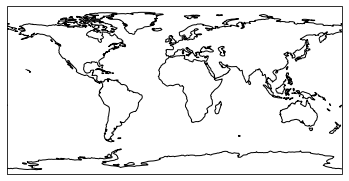

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

A list of the available projections can be found on the [Cartopy projection list page](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections).

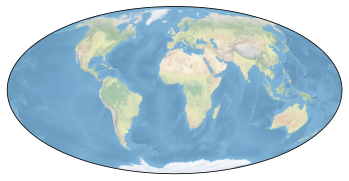

In [12]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

We can combine the functionality of `cartopy` with `geopandas` plots:

<GeoAxesSubplot:>

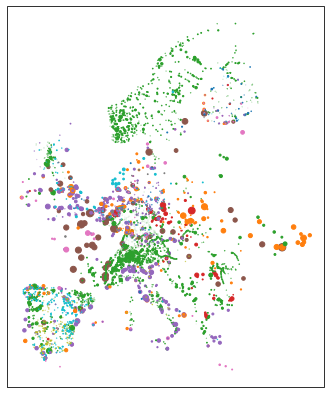

In [13]:
fig = plt.figure(figsize=(7,7))

ax = plt.axes(projection=ccrs.PlateCarree())

gdf.plot(
    ax=ax,
    column='Fueltype',
    markersize=gdf.Capacity/1e2,
)

We can add further [geographic features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#the-cartopy-feature-interface) to this map for better orientation.

For instance, we can add the coastlines...

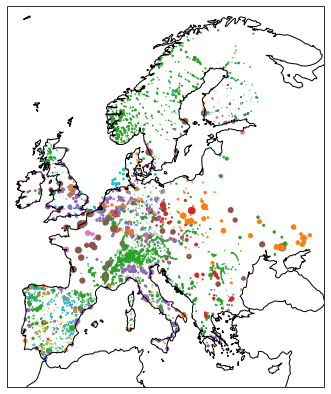

In [14]:
ax.coastlines()
fig

... country borders ...

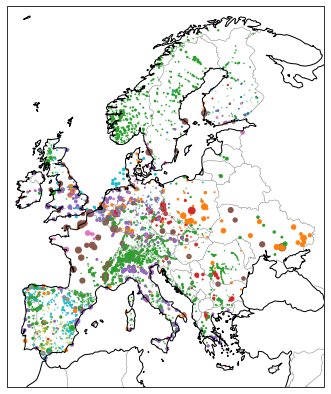

In [15]:
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
fig

... colour in the ocean in blue ...

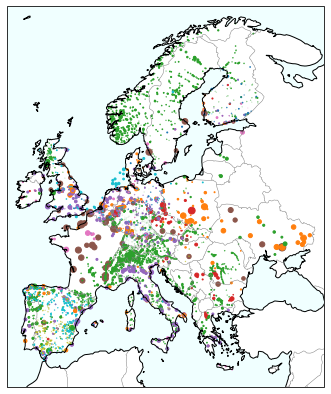

In [16]:
ax.add_feature(cartopy.feature.OCEAN, color='azure')
fig

...and color in the land area in yellow ...

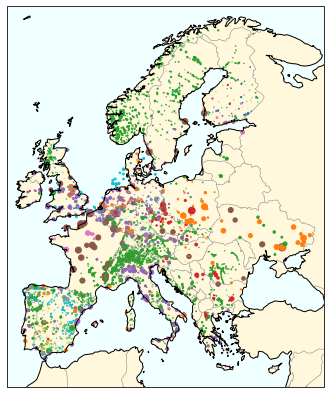

In [17]:
ax.add_feature(cartopy.feature.LAND, color='cornsilk')
fig

Geopandas will automatically calculate sensible bounds for the plot given the geographic data.
But we can also manually zoom in or out by setting the spatial extent with the `.set_extent()` method:

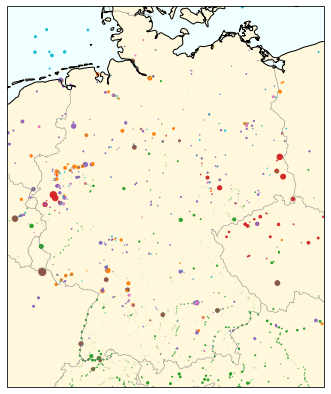

In [18]:
ax.set_extent([5, 16, 47, 55])
fig

### Reprojecting a `GeoDataFrame`

In `geopandas`, we can use the function `.to_crs()` to convert a `GeoDataFrame` to a desired coordinate reference system. In this particular case, we use the `proj4_init` string of an initialised `cartopy` projection to reproject our power plant `GeoDataFrame`.

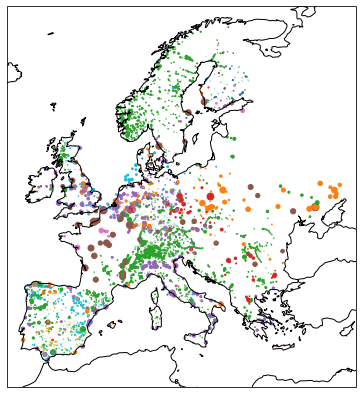

In [19]:
fig = plt.figure(figsize=(7,7))

crs = ccrs.AlbersEqualArea()

ax = plt.axes(projection=crs)

gdf.to_crs(crs.proj4_init).plot(
    ax=ax,
    column='Fueltype',
    markersize=gdf.Capacity/1e2,
)

ax.coastlines()

## Reading and Writing Files with `geopandas`

In the following example, we'll load a dataset containing the [NUTS regions](https://en.wikipedia.org/wiki/Nomenclature_of_Territorial_Units_for_Statistics):

> Nomenclature of Territorial Units for Statistics or NUTS (French: Nomenclature des unités territoriales statistiques) is a geocode standard for referencing the subdivisions of countries for statistical purposes.

Our ultimate **goal** for this part of the tutorial is to map the power plant capacities to the NUTS-1 region they belong to.

<img src="https://ec.europa.eu/eurostat/documents/345175/501899/framing" width="400px" />

Common filetypes for vector-based geospatial datasets are GeoPackage (`.gpkg`), GeoJSON (`.geojson`), File Geodatabase (`.gdb`), or Shapefiles (`.shp`).

In `geopandas` we can use the `gpd.read_file()` function to read such files. So let's start:

In [20]:
url = "https://tubcloud.tu-berlin.de/s/RHZJrN8Dnfn26nr/download/NUTS_RG_10M_2021_4326.geojson"

In [21]:
nuts = gpd.read_file(url)

HTTPError: HTTP Error 504: Gateway Time-out

In [ ]:
nuts.head(3)

It is good practice to set an index. You can use `.set_index()` for that:

In [ ]:
nuts = nuts.set_index('id')

We can also check out the geometries in the dataset with `.geometry`:

In [ ]:
nuts.geometry

With `.crs` we can check in which coordinate reference system the data is given:

In [ ]:
nuts.crs

In [ ]:
nuts.total_bounds

Let's filter by NUTS-1 level...

In [ ]:
nuts1 = nuts.query("LEVL_CODE == 1")

... and explore what kind of geometries we have in the dataset ...

In [ ]:
nuts1.explore()

To write a GeoDataFrame back to file use `GeoDataFrame.to_file()`. The file format is inferred from the file ending.

In [ ]:
nuts1.to_file("NUTS1.geojson")

## Calculating the areas and buffers

The first thing we need to do to calculate area or buffers is to reproject the `GeoDataFrame` to an equal-area projection (here: [EPSG:3035](https://epsg.io/3035)):

In [ ]:
nuts1 = nuts1.to_crs(3035)

The area can be accessed via `.area` and is given in m² (after projection). Let's convert to km²:

In [ ]:
area = nuts1.area / 1e6
area

In [ ]:
nuts1.explore(column=area, vmax=1e5)

We can also build a buffer of 1km around each geometry using `.buffer()`:

In [ ]:
nuts1.buffer(1000).explore()

## Joining spatial datasets

Multiple `GeoDataFrames` can be combined via *spatial joins*.

Observations from two datasets are combined with the `.sjoin()` function based on their spatial relationship to one another (e.g. whether they are intersecting or overlapping). You can read more about the specific options [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#binary-predicate-joins).

Let's first reproject the `gdf` object to the same CRS as `nuts1`:

In [ ]:
gdf = gdf.to_crs(3035)

Then, let's have a look at both datasets at once. We want to find out which points (representing power plants) lie within which shape (representing NUTS regions).

In [ ]:
fig = plt.figure(figsize=(7,7))

ax = plt.axes(projection=ccrs.epsg(3035))

nuts1.plot(
    ax=ax,
    edgecolor='black',
    facecolor='lightgrey'
)

gdf.to_crs(3035).plot(
    ax=ax,
    column='Fueltype',
    markersize=gdf.Capacity/20,
    legend=True
)

ax.set_extent([5, 19, 47, 55])

We can now apply the `.sjoin` function to look for which power plants lie within which NUTS1 region. By default, `sjoin` looks for intersections and keeps the geometries of the *left* `GeoDataFrame`.

In [ ]:
joined = gdf.sjoin(nuts1)

If we look at this new `GeoDataFrame`, we now have additional columns from the NUTS1 data:

In [ ]:
joined.head(3)

We can now use these new columns to group the capacities (and convert to a suitable unit):

In [ ]:
cap = joined.groupby("NUTS_ID").Capacity.sum() / 1000 # GW

Let's quickly check if all NUTS1 regions have power plants:

In [ ]:
nuts1.index.difference(cap.index)

This is not the case. Then it is good practice to reindex the series to include all NUTS1 regions, even if this leads to some NaN values.

In [ ]:
cap = cap.reindex(nuts1.index)

In [ ]:
cap

Finally, we can plot the total generation capacity per NUTS1 region on a map.

In [ ]:
nuts1.plot(figsize=(7,7), column=cap, legend=True)

This concludes the `geopandas` and `cartopy` tutorial.

## Exercises

**Task 1:** Recreate the figure above (i.e. generation capacity per NUTS1 region)
- using 3 different [cartopy projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) of your choice.
- such that the capacities are normalised by the area of the NUTS1 region (unit: MW/km²).
- such that it only shows the hard coal power plant capacities.
- such that it only shows NUTS1 shapes for Germany (and Denmark).
- but with NUTS2 regions instead of NUTS1 regions.
- (advanced) such that it shows the capacity-weighted average age of the power plants instead of the capacities. Where are the oldest generators? Can you think of a reason why?

Which German NUTS2 region has the highest conventional generation capacity? Can you think of a reason why?

Three projections of choice:

In [ ]:
for crs in [ccrs.EqualEarth(), ccrs.AlbersEqualArea(), ccrs.Orthographic()]:
    fig = plt.figure()
    ax = plt.axes(projection=crs)
    nuts1.to_crs(crs.proj4_init).plot(ax=ax, column=cap, legend=True)

Normalised by area in MW/km²:

In [ ]:
nuts1.plot(figsize=(7,7), column=cap/(nuts1.area/1e9), legend=True)

Only hard coal generators:

In [ ]:
hard_coal_cap = (
    joined
    .query("Fueltype == 'Hard Coal'")
    .groupby("NUTS_ID").Capacity.sum()
    .reindex(nuts1.index)
    .div(1e3)
)
nuts1.plot(
    figsize=(7,7),
    column=hard_coal_cap,
    legend=True,
    missing_kwds=dict(color='lightgrey')
)
plt.ylim(1e6, 6e6)
plt.xlim(2e6, 6e6);

Only Germany:

In [ ]:
subregion = nuts1.query("CNTR_CODE == 'DE'")
subregion.plot(column=cap.reindex(subregion.index), legend=True)

Only Germany and Denmark:

In [ ]:
countries = ['DE', 'DK']
subregion = nuts1.query("CNTR_CODE in @countries") # alternative A
subregion = nuts1.loc[nuts1.CNTR_CODE.isin(countries)] # alternative B
subregion.plot(column=cap.reindex(subregion.index), legend=True)

In NUTS2 rather than NUTS1:

In [ ]:
nuts2 = nuts.query("LEVL_CODE == 2").to_crs(3035)
joined2 = gdf.sjoin(nuts2)
cap2 = joined2.groupby("NUTS_ID").Capacity.sum().reindex(nuts2.index).div(1000) # GW
nuts2.plot(figsize=(7,7), column=cap2, legend=True)

NUTS2 region with highest capacity:

In [ ]:
cap2.sort_values(ascending=False).head(1) # alternative A

In [ ]:
cap2.idxmax() # alternative B

Capacity-weighted average age:

In [ ]:
def calculate_weighted_age(x):
    """
    Formula:
    \bar{x} = \frac{ \sum\limits_{i=1}^n w_i x_i}{\sum\limits_{i=1}^n w_i}
    """
    
    numerator = (x.Capacity * x.DateIn).sum()
    
    # only build sum of capacities where a date is given
    denominator = x.Capacity.where(~x.DateIn.isna()).sum()
    
    return numerator / denominator

age = joined.groupby("NUTS_ID").apply(calculate_weighted_age).reindex(nuts1.index)

nuts1.plot(figsize=(7,7), column=age, legend=True)

**Task 2:** Load the following `.gpkg` file containing the Danish [Natura2000](https://en.wikipedia.org/wiki/Natura_2000) natural protection areas as `GeoDataFrame`: 

https://tubcloud.tu-berlin.de/s/mEpdmgBtmMbyjAr/download/Natura2000_end2021-DK.gpkg

- How many individual natural protection areas are there?
- What is the name of the largest natural protection area in Denmark?
- What is the total protection area in square kilometers (make sure you don't double-count overlapping areas by running the [`.dissolve()`](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html#dissolve-example) function).
- (advanced) Use [set operations with the `.overlay()` function](https://geopandas.org/en/stable/docs/user_guide/set_operations.html#set-operations-with-overlay) and the NUTS1 regions `GeoDataFrame` to identify what share of Danish natural protection areas is at sea.

In [ ]:
url = "https://tubcloud.tu-berlin.de/s/mEpdmgBtmMbyjAr/download/Natura2000_end2021-DK.gpkg"

In [ ]:
natura = gpd.read_file(url)

In [ ]:
natura.plot(alpha=0.5)

In [ ]:
natura.crs

How many:

In [ ]:
len(natura)

Name of largest protection area:

In [ ]:
i = natura.area.idxmax()
i

In [ ]:
natura.loc[i]

Total area in km²:

In [ ]:
total = natura.dissolve()

In [ ]:
total.plot(alpha=0.5)

In [ ]:
total.area / 1e6 # sqkm

Share of natural protection area offshore:

In [ ]:
onshore_natura = gpd.overlay(nuts1.dissolve(), total)

In [ ]:
onshore_natura.explore()

In [ ]:
1 - onshore_natura.area[0] / total.area[0]